In [3]:
# Import libraries  
import numpy as np # for linear algebra  
import pandas as pd # for data processing, CSV file I/O (e.g. pd.read_csv)  
import seaborn as sns # for data visualization  
import matplotlib.pyplot as plt # to plot data visualization charts  
from collections import Counter  
import os  
  
# Modeling Libraries  
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score  
from sklearn.preprocessing import QuantileTransformer  
from sklearn.linear_model import LogisticRegression  
from sklearn.neighbors import KNeighborsClassifier  
from sklearn.tree import DecisionTreeClassifier  
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier  
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve, train_test_split  
from sklearn.svm import SVC  

In [ ]:
# Importing the dataset
df = pd.read_csv("Diabetes1.csv")  
  
# First step is getting familiar with the structure of the dataset  
df.info()  

In [19]:
import pandas as pd

# Correct file path with raw string
file_path = r'C:\Users\mohan\OneDrive\Documents\DataSet_details\OneDrive\Diabetes1.csv'

# Read the CSV file
df = pd.read_csv(file_path)

# Print the first few rows of the DataFrame
print(df.head())



   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 767 entries, 0 to 766
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               767 non-null    int64  
 1   Glucose                   767 non-null    int64  
 2   BloodPressure             767 non-null    int64  
 3   SkinThickness             767 non-null    int64  
 4   Insulin                   767 non-null    int64  
 5   BMI                       767 non-null    float64
 6   DiabetesPedigreeFunction  767 non-null    float64
 7   Age                       767 non-null    int64  
 8   Outcome                   767 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [22]:
# Showing the top 5 rows of the dataset  
df.head()  

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [23]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000
mean,3.848761,120.930900,69.104302,20.522816,79.903520,31.994654,0.472081,33.254237,0.349413
std,3.370207,31.977581,19.368410,15.958143,115.283105,7.889095,0.331496,11.762079,0.477096
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243500,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,32.000000,32.000000,0.374000,29.000000,0.000000
75%,6.000000,140.500000,80.000000,32.000000,127.500000,36.600000,0.626500,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [24]:
# Exploring the missing values in the diabetes dataset  
df.isnull().sum()  

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [25]:
# Replacing 0 values of Glucose
df['Glucose'] = df['Glucose'].replace(0,df['Glucose'].mean())
df.Glucose.value_counts()

Glucose
99.0     17
100.0    17
111.0    14
125.0    14
129.0    14
         ..
56.0      1
169.0     1
149.0     1
65.0      1
190.0     1
Name: count, Length: 136, dtype: int64

In [26]:
# Filling 0 values of Blood Pressure  
df[df['BloodPressure'] == 0]['BloodPressure'].value_counts()
df['BloodPressure'] = df['BloodPressure'].replace(0,df['BloodPressure'].mean())

In [27]:
# Replacing 0 values in BMI
df[df['BMI'] == 0]['BMI'].value_counts()
df['BMI'] = df['BMI'].replace(0, df['BMI'].median())

In [28]:
# Replacing the missing values of Insulin and SkinThickness  
df['SkinThickness'] = df['SkinThickness'].replace(0, df['SkinThickness'].median())
df['Insulin'] = df['Insulin'].replace(0, df['Insulin'].median())
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35,32,33.6,0.627,50,1
1,1,85.0,66.0,29,32,26.6,0.351,31,0
2,8,183.0,64.0,23,32,23.3,0.672,32,1
3,1,89.0,66.0,23,94,28.1,0.167,21,0
4,0,137.0,40.0,35,168,43.1,2.288,33,1


In [29]:
# Review dataset statistics
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,767.000000,767.000000,767.000000,767.000000,767.00000,767.000000,767.000000,767.000000,767.000000
mean,3.848761,121.719237,72.257693,27.329857,95.46545,32.453585,0.472081,33.254237,0.349413
std,3.370207,30.438211,12.123577,9.234086,105.14839,6.879453,0.331496,11.762079,0.477096
min,0.000000,44.000000,24.000000,7.000000,14.00000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,100.000000,64.000000,23.000000,32.00000,27.500000,0.243500,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,32.00000,32.000000,0.374000,29.000000,0.000000
75%,6.000000,140.500000,80.000000,32.000000,127.50000,36.600000,0.626500,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.00000,67.100000,2.420000,81.000000,1.000000


In [30]:
# Show top 5 rows
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35,32,33.6,0.627,50,1
1,1,85.0,66.0,29,32,26.6,0.351,31,0
2,8,183.0,64.0,23,32,23.3,0.672,32,1
3,1,89.0,66.0,23,94,28.1,0.167,21,0
4,0,137.0,40.0,35,168,43.1,2.288,33,1


<Axes: >

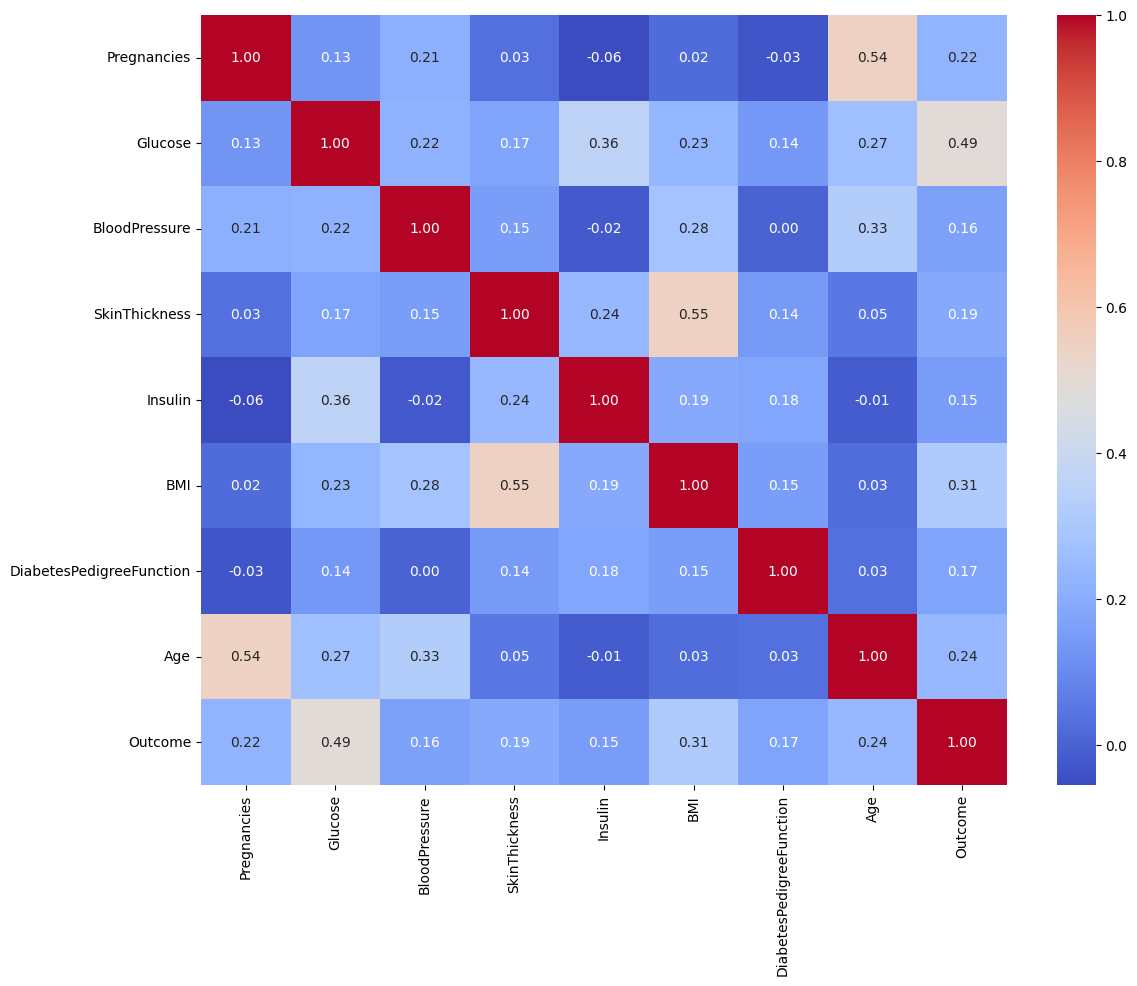

In [31]:
plt.figure(figsize=(13,10))
sns.heatmap(df.corr(),annot=True, fmt = ".2f", cmap = "coolwarm")

In [32]:
Pregnancies

5

C:\Users\mohan\AppData\Local\Temp\ipykernel_14796\3351199165.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  g = sns.kdeplot(df["Pregnancies"][df["Outcome"] == 1], color="Red", shade = True)
C:\Users\mohan\AppData\Local\Temp\ipykernel_14796\3351199165.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  g = sns.kdeplot(df["Pregnancies"][df["Outcome"] == 0], ax =g, color="Green", shade= True)


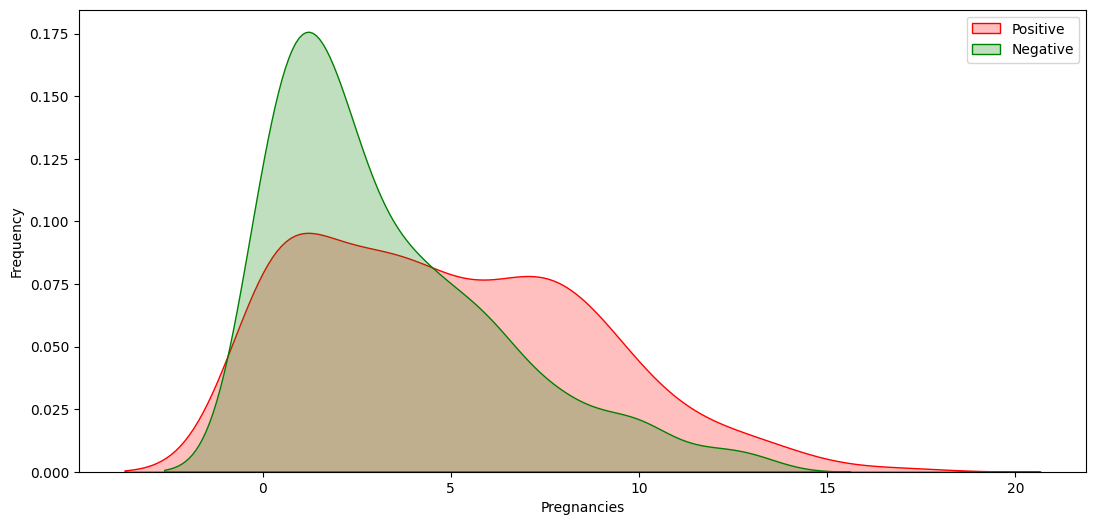

In [33]:
# Explore Pregnancies vs Outcome
plt.figure(figsize=(13,6))
g = sns.kdeplot(df["Pregnancies"][df["Outcome"] == 1], color="Red", shade = True)
g = sns.kdeplot(df["Pregnancies"][df["Outcome"] == 0], ax =g, color="Green", shade= True)
g.set_xlabel("Pregnancies")
g.set_ylabel("Frequency")
g.legend(["Positive","Negative"])


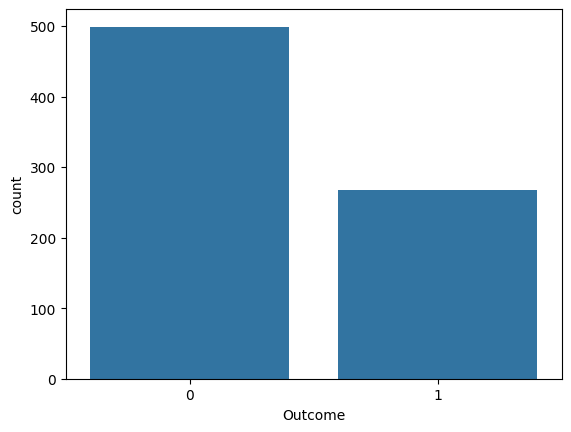

In [34]:
sns.countplot(x='Outcome', data=df)
plt.show()

In [35]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35,32,33.6,0.627,50,1
1,1,85.0,66.0,29,32,26.6,0.351,31,0
2,8,183.0,64.0,23,32,23.3,0.672,32,1
3,1,89.0,66.0,23,94,28.1,0.167,21,0
4,0,137.0,40.0,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
762,9,89.0,62.0,23,32,22.5,0.142,33,0
763,10,101.0,76.0,48,180,32.9,0.171,63,0
764,2,122.0,70.0,27,32,36.8,0.340,27,0
765,5,121.0,72.0,23,112,26.2,0.245,30,0


In [36]:
Glucose

120

<Axes: xlabel='Outcome', ylabel='Glucose'>

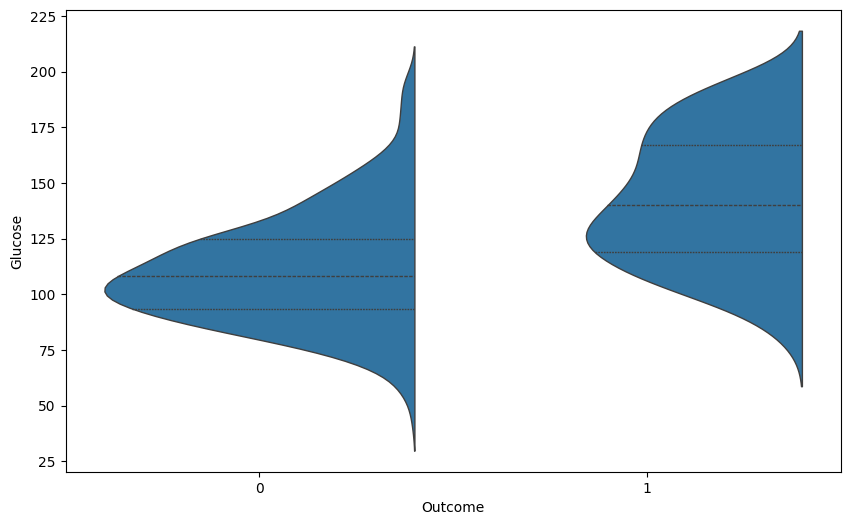

In [37]:
# Exploring the Glucose and the Target variables together  
plt.figure(figsize=(10,6))
sns.violinplot(data=df, x="Outcome", y="Glucose",
               split=True, inner="quart", linewidth=1)

C:\Users\mohan\AppData\Local\Temp\ipykernel_14796\3811596323.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  g = sns.kdeplot(df["Glucose"][df["Outcome"] == 1], color="Red", shade = True)
C:\Users\mohan\AppData\Local\Temp\ipykernel_14796\3811596323.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  g = sns.kdeplot(df["Glucose"][df["Outcome"] == 0], ax =g, color="Green", shade= True)


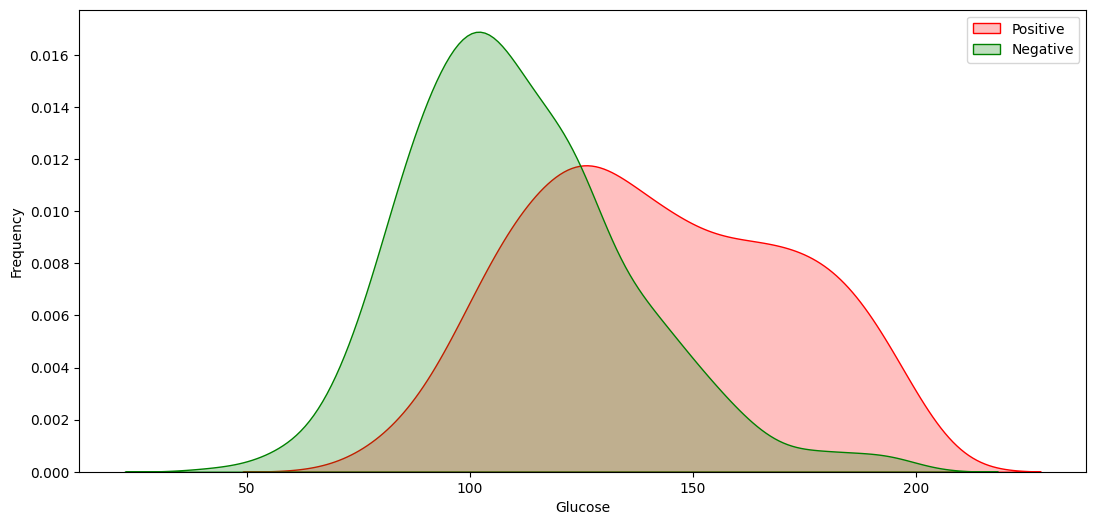

In [38]:
# Explore Glucose vs Outcome

plt.figure(figsize=(13,6))
g = sns.kdeplot(df["Glucose"][df["Outcome"] == 1], color="Red", shade = True)
g = sns.kdeplot(df["Glucose"][df["Outcome"] == 0], ax =g, color="Green", shade= True)
g.set_xlabel("Glucose")
g.set_ylabel("Frequency")
g.legend(["Positive","Negative"])


<Axes: xlabel='Glucose', ylabel='BMI'>

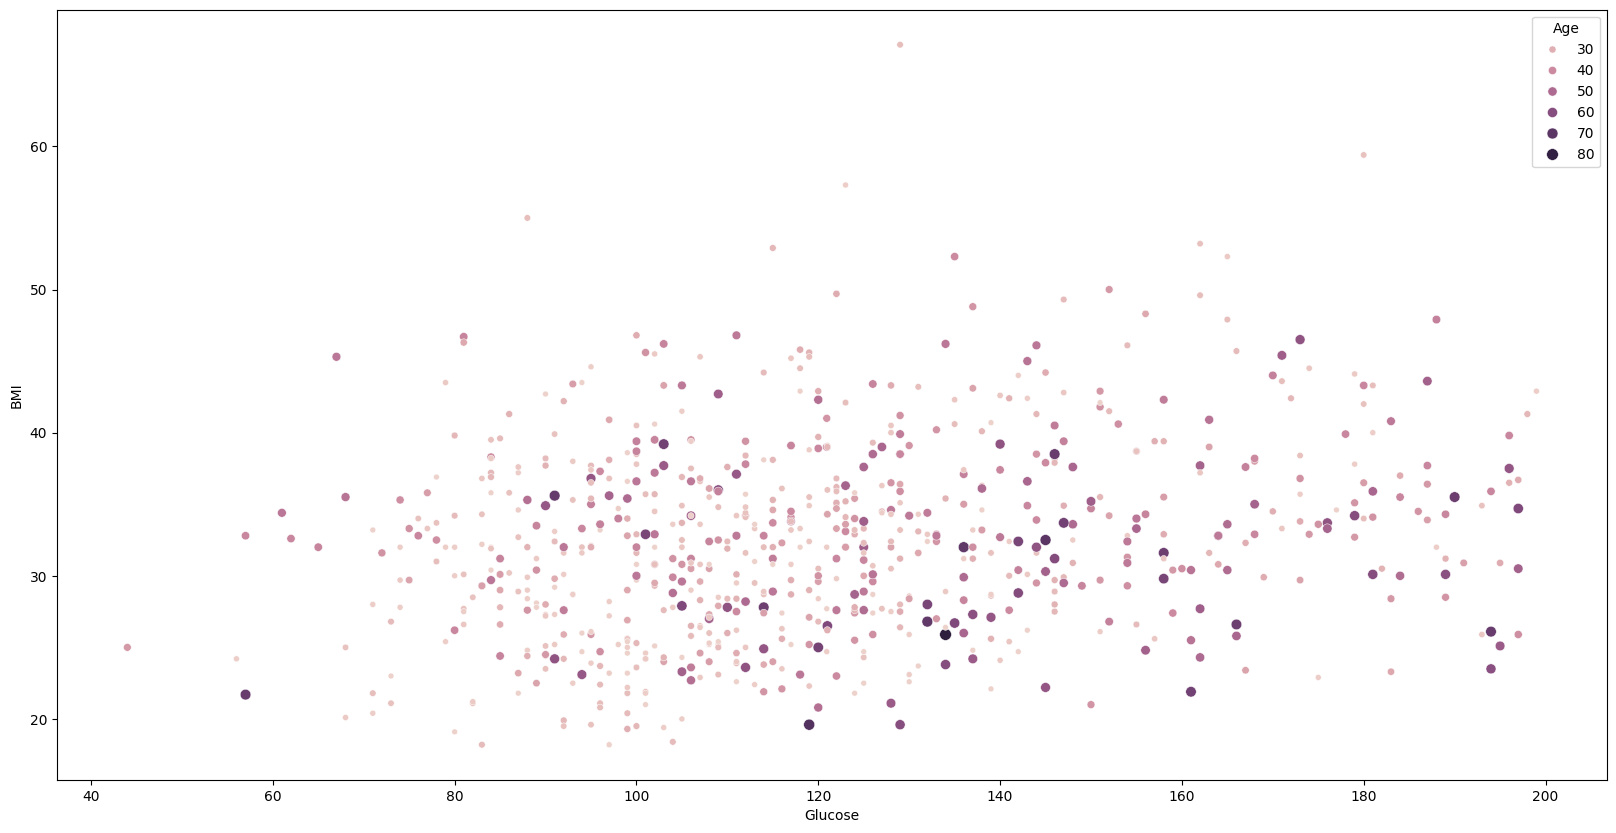

In [39]:
# Glucose vs BMI vs Age

plt.figure(figsize=(20,10))
sns.scatterplot(data=df, x="Glucose", y="BMI", hue="Age", size="Age")

In [40]:
BloodPressure

80

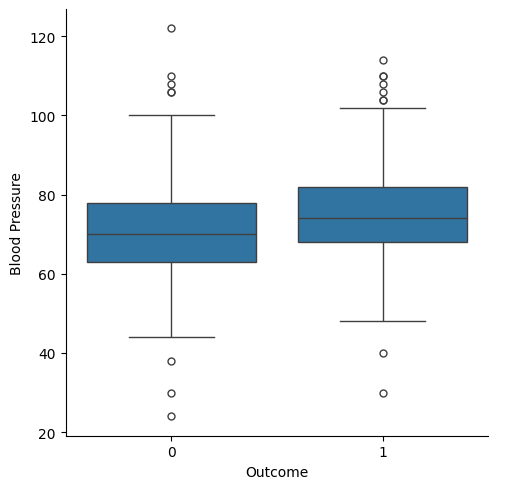

In [41]:
# Explore Age vs Sex, Parch , Pclass and SibSP
g = sns.catplot(y="BloodPressure",x="Outcome",data=df,kind="box")
g.set_ylabels("Blood Pressure")
g.set_xlabels("Outcome")

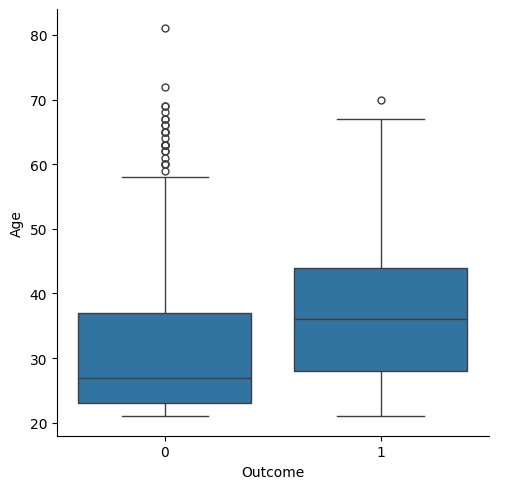

In [42]:
# Explore Age

g = sns.catplot(y="Age",x="Outcome",data=df,kind="box")
g.set_ylabels("Age")
g.set_xlabels("Outcome")

C:\Users\mohan\AppData\Local\Temp\ipykernel_14796\3471620922.py:4: FutureWarning: 

The `scale` parameter has been renamed to `width_method` and will be removed in v0.15. Pass `width_method='linear' for the same effect.
  sns.boxenplot(x="Outcome", y="DiabetesPedigreeFunction",


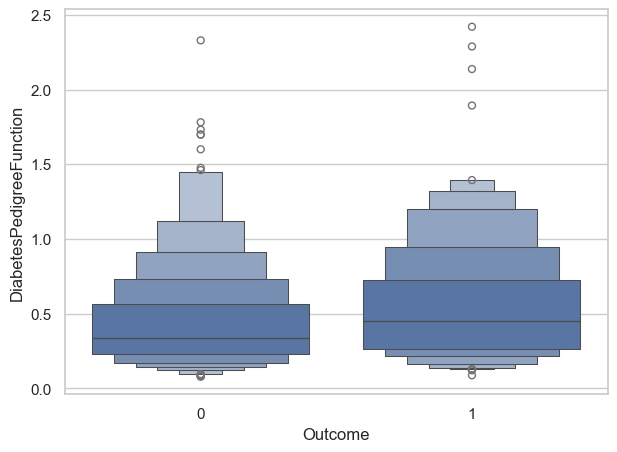

In [43]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(7,5))

sns.boxenplot(x="Outcome", y="DiabetesPedigreeFunction",
              color="b", 
              scale="linear", data=df)
g.set_ylabels("Diabetes Pedigree Function")
g.set_xlabels("Outcome")

In [45]:
def detect_outliers(df,n,features):
    outlier_indices = []
    """
    Detect outliers from given list of features. It returns a list of the indices
    according to the observations containing more than n outliers according
    to the Tukey method
    """
    # iterate over features(columns)
    for col in features:
        Q1 = np.percentile(df[col], 25)
        Q3 = np.percentile(df[col],75)
        IQR = Q3 - Q1
        
        # outlier step
        outlier_step = 1.5 * IQR
        
        # Determine a list of indices of outliers for feature col
        outlier_list_col = df[(df[col] < Q1 - outlier_step) | (df[col] > Q3 + outlier_step )].index
        
        # append the found outlier indices for col to the list of outlier indices 
        outlier_indices.extend(outlier_list_col)
        
    # select observations containing more than 2 outliers
    outlier_indices = Counter(outlier_indices)
    multiple_outliers = list( k for k, v in outlier_indices.items() if v > n )
    
    return multiple_outliers   

# detect outliers from numeric features
outliers_to_drop = detect_outliers(df, 2 ,["Pregnancies", 'Glucose', 'BloodPressure', 'BMI', 'DiabetesPedigreeFunction', 'SkinThickness', 'Insulin', 'Age'])

In [46]:
df.loc[outliers_to_drop] # Show the outliers rows

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
177,0,129.0,110.0,46,130,67.1,0.319,26,1
445,0,180.0,78.0,63,14,59.4,2.420,25,1
370,3,173.0,82.0,48,465,38.4,2.137,25,1


In [47]:
df.drop(df.loc[outliers_to_drop].index, inplace=True)

In [48]:
q  = QuantileTransformer()
X = q.fit_transform(df)
transformedDF = q.transform(X)
transformedDF = pd.DataFrame(X)
transformedDF.columns =['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']

C:\Users\mohan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\preprocessing\_data.py:2824: UserWarning: n_quantiles (1000) is greater than the total number of samples (764). n_quantiles is set to n_samples.
  warnings.warn(
C:\Users\mohan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but QuantileTransformer was fitted with feature names
  warnings.warn(


In [49]:
transformedDF.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.746396,0.811927,0.518349,0.804718,0.256225,0.593054,0.752294,0.889253,1.0
1,0.230013,0.091743,0.291612,0.647444,0.256225,0.214286,0.475754,0.556356,0.0
2,0.862385,0.956750,0.234600,0.359109,0.256225,0.077982,0.783748,0.582569,1.0
3,0.230013,0.125164,0.291612,0.359109,0.662516,0.285714,0.106815,0.000000,0.0
4,0.000000,0.722805,0.005242,0.804718,0.834207,0.929227,0.998689,0.604194,1.0


In [51]:
## Separate train dataset and test dataset
features = df.drop(["Outcome"], axis=1)
labels = df["Outcome"]
x_train, x_test, y_train, y_test = train_test_split(features, labels, test_size=0.30, random_state=7)

In [52]:
def evaluate_model(models):
    """
    Takes a list of models and returns chart of cross validation scores using mean accuracy
    """
    
    # Cross validate model with Kfold stratified cross val
    kfold = StratifiedKFold(n_splits = 10)
    
    result = []
    for model in models :
        result.append(cross_val_score(estimator = model, X = x_train, y = y_train, scoring = "accuracy", cv = kfold, n_jobs=4))

    cv_means = []
    cv_std = []
    for cv_result in result:
        cv_means.append(cv_result.mean())
        cv_std.append(cv_result.std())

    result_df = pd.DataFrame({
        "CrossValMeans":cv_means,
        "CrossValerrors": cv_std,
        "Models":[
            "LogisticRegression",
            "DecisionTreeClassifier",
            "AdaBoostClassifier",
            "SVC",
            "RandomForestClassifier",
            "GradientBoostingClassifier",
            "KNeighborsClassifier"
        ]
    })

    # Generate chart
    bar = sns.barplot(x = "CrossValMeans", y = "Models", data = result_df, orient = "h")
    bar.set_xlabel("Mean Accuracy")
    bar.set_title("Cross validation scores")
    return result_df

,CrossValMeans,CrossValerrors,Models
0,0.752516,0.063759,LogisticRegression
1,0.716911,0.078937,DecisionTreeClassifier
2,0.724563,0.072631,AdaBoostClassifier
3,0.756184,0.069379,SVC
4,0.761880,0.087844,RandomForestClassifier
5,0.771384,0.067778,GradientBoostingClassifier
6,0.737736,0.084850,KNeighborsClassifier


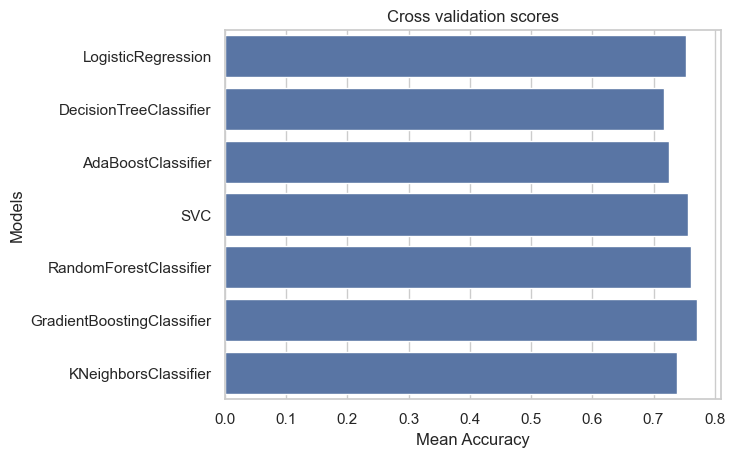

In [53]:
# Modeling step Test differents algorithms 
random_state = 30
models = [
    LogisticRegression(random_state = random_state, solver='liblinear'),
    DecisionTreeClassifier(random_state = random_state),
    AdaBoostClassifier(DecisionTreeClassifier(random_state = random_state), random_state = random_state, learning_rate = 0.2),
    SVC(random_state = random_state),
    RandomForestClassifier(random_state = random_state),
    GradientBoostingClassifier(random_state = random_state),
    KNeighborsClassifier(),
]
evaluate_model(models)

In [54]:
# Import libraries
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

In [55]:
def analyze_grid_result(grid_result):
    '''
    Analysis of GridCV result and predicting with test dataset
    Show classification report at last
    '''

    # Best parameters and accuracy
    print("Tuned hyperparameters: (best parameters) ", grid_result.best_params_)
    print("Accuracy :", grid_result.best_score_)
    
    means = grid_result.cv_results_["mean_test_score"]
    stds = grid_result.cv_results_["std_test_score"]
    for mean, std, params in zip(means, stds, grid_result.cv_results_["params"]):
        print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))
    print()

    print("Detailed classification report:")
    print()
    y_true, y_pred = y_test, grid_result.predict(x_test)
    print(classification_report(y_true, y_pred))
    print()

In [56]:
# Define models and parameters for LogisticRegression
model = LogisticRegression(solver='liblinear')
solvers = ['newton-cg', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]

# Define grid search
grid = dict(solver = solvers, penalty = penalty, C = c_values)
cv = StratifiedKFold(n_splits = 50, random_state = 1, shuffle = True)
grid_search = GridSearchCV(estimator = model, param_grid = grid, cv = cv, scoring = 'accuracy', error_score = 0)
logi_result = grid_search.fit(x_train, y_train)

# Logistic Regression Hyperparameter Result
analyze_grid_result(logi_result)

Tuned hyperparameters: (best parameters)  {'C': 0.01, 'penalty': 'l2', 'solver': 'newton-cg'}
Accuracy : 0.7756363636363637
0.772 (+/-0.245) for {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
0.773 (+/-0.239) for {'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}
0.772 (+/-0.245) for {'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}
0.770 (+/-0.248) for {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
0.775 (+/-0.241) for {'C': 1.0, 'penalty': 'l2', 'solver': 'newton-cg'}
0.759 (+/-0.236) for {'C': 1.0, 'penalty': 'l2', 'solver': 'liblinear'}
0.775 (+/-0.250) for {'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'}
0.723 (+/-0.269) for {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
0.776 (+/-0.232) for {'C': 0.01, 'penalty': 'l2', 'solver': 'newton-cg'}
0.706 (+/-0.257) for {'C': 0.01, 'penalty': 'l2', 'solver': 'liblinear'}

Detailed classification report:

              precision    recall  f1-score   support

           0       0.76      0.85      0.80       146
           1 

In [57]:
# Define models and parameters for LogisticRegression
model = SVC()

# Define grid search
tuned_parameters = [
    {"kernel": ["rbf"], "gamma": [1e-3, 1e-4], "C": [1, 10, 100, 1000]},
    {"kernel": ["linear"], "C": [1, 10, 100, 1000]},
]
cv = StratifiedKFold(n_splits = 2, random_state = 1, shuffle = True)
grid_search = GridSearchCV(estimator = model, param_grid = tuned_parameters, cv = cv, scoring = 'accuracy', error_score = 0)
scv_result = grid_search.fit(x_train, y_train)

# SVC Hyperparameter Result
analyze_grid_result(scv_result)

Tuned hyperparameters: (best parameters)  {'C': 100, 'kernel': 'linear'}
Accuracy : 0.7771535580524345
0.734 (+/-0.022) for {'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}
0.757 (+/-0.007) for {'C': 1, 'gamma': 0.0001, 'kernel': 'rbf'}
0.719 (+/-0.022) for {'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}
0.757 (+/-0.030) for {'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}
0.702 (+/-0.041) for {'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}
0.753 (+/-0.030) for {'C': 100, 'gamma': 0.0001, 'kernel': 'rbf'}
0.689 (+/-0.045) for {'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}
0.728 (+/-0.004) for {'C': 1000, 'gamma': 0.0001, 'kernel': 'rbf'}
0.766 (+/-0.019) for {'C': 1, 'kernel': 'linear'}
0.768 (+/-0.007) for {'C': 10, 'kernel': 'linear'}
0.777 (+/-0.004) for {'C': 100, 'kernel': 'linear'}
0.764 (+/-0.037) for {'C': 1000, 'kernel': 'linear'}

Detailed classification report:

              precision    recall  f1-score   support

           0       0.76      0.86      0.81       146
           1       0.69     

In [58]:
# Define models and parameters for LogisticRegression
model = RandomForestClassifier(random_state=42)


# Define grid search
tuned_parameters = { 
    'n_estimators': [200, 500],
    'max_features': [ 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}
cv = StratifiedKFold(n_splits = 2, random_state = 1, shuffle = True)
grid_search = GridSearchCV(estimator = model, param_grid = tuned_parameters, cv = cv, scoring = 'accuracy', error_score = 0)
grid_result = grid_search.fit(x_train, y_train)

# SVC Hyperparameter Result
analyze_grid_result(grid_result)

Tuned hyperparameters: (best parameters)  {'criterion': 'entropy', 'max_depth': 6, 'max_features': 'sqrt', 'n_estimators': 200}
Accuracy : 0.7715355805243446
0.760 (+/-0.007) for {'criterion': 'gini', 'max_depth': 4, 'max_features': 'sqrt', 'n_estimators': 200}
0.768 (+/-0.007) for {'criterion': 'gini', 'max_depth': 4, 'max_features': 'sqrt', 'n_estimators': 500}
0.755 (+/-0.004) for {'criterion': 'gini', 'max_depth': 4, 'max_features': 'log2', 'n_estimators': 200}
0.758 (+/-0.004) for {'criterion': 'gini', 'max_depth': 4, 'max_features': 'log2', 'n_estimators': 500}
0.768 (+/-0.015) for {'criterion': 'gini', 'max_depth': 5, 'max_features': 'sqrt', 'n_estimators': 200}
0.762 (+/-0.004) for {'criterion': 'gini', 'max_depth': 5, 'max_features': 'sqrt', 'n_estimators': 500}
0.758 (+/-0.004) for {'criterion': 'gini', 'max_depth': 5, 'max_features': 'log2', 'n_estimators': 200}
0.753 (+/-0.000) for {'criterion': 'gini', 'max_depth': 5, 'max_features': 'log2', 'n_estimators': 500}
0.760 (+/-

In [59]:
y_pred = logi_result.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.76      0.85      0.80       146
           1       0.67      0.54      0.60        84

    accuracy                           0.73       230
   macro avg       0.72      0.69      0.70       230
weighted avg       0.73      0.73      0.73       230



In [60]:
x_test['pred'] = y_pred
x_test

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,pred
319,6,194.0,78.0,23,32,23.5,0.129,59,1
743,9,140.0,94.0,23,32,32.7,0.734,45,1
236,7,181.0,84.0,21,192,35.9,0.586,51,1
686,3,130.0,64.0,23,32,23.1,0.314,22,0
411,1,112.0,72.0,30,176,34.4,0.528,25,0
...,...,...,...,...,...,...,...,...,...
428,0,135.0,94.0,46,145,40.6,0.284,26,0
695,7,142.0,90.0,24,480,30.4,0.128,43,0
206,8,196.0,76.0,29,280,37.5,0.605,57,1
488,4,99.0,72.0,17,32,25.6,0.294,28,0
